**Amos Boldor** Sunday, February 5, 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint
import collections

In [2]:
data = pd.read_csv(os.getcwd() + '/Food_Inspections.csv')

**Food Inspections in Chicago**


This information is derived from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to February 3, 2017. Inspections are performed by staff from the Chicago Department of Public Health’s Food Protection Program using a standardized procedure. The results of the inspection are inputted into a database, then reviewed and approved by a State of Illinois Licensed Environmental Health Practitioner (LEHP). For descriptions of the data elements included in this set, go to http://bit.ly/tS9IE8 


https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5

In [3]:
data

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1963232,STARBUCKS COFFEE #48615,STARBUCKS COFFEE,2506134.0,Restaurant,Risk 2 (Medium),1601 W IRVING PARK RD,CHICAGO,IL,60613.0,02/03/2017,License,Not Ready,NaN,41.954180,-87.669108,"(41.954179806756535, -87.66910774431463)"
1,1982654,JINYA RAMEN BAR,JINYA RAMEN BAR,2391406.0,Restaurant,Risk 1 (High),553-555 W DIVERSEY PKWY,CHICAGO,IL,60614.0,02/03/2017,Complaint,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.932724,-87.643249,"(41.932723556914546, -87.64324937587931)"
2,1963230,SARPINOS PIZZERIA,SARPINOS PIZZERIA,1899258.0,Restaurant,Risk 2 (Medium),1435 W MONTROSE AVE,CHICAGO,IL,60613.0,02/03/2017,Canvass,Out of Business,NaN,41.961520,-87.666344,"(41.96152004287502, -87.66634370710501)"
3,1963229,"WRIGLEYVILLE PIZZERIA, INC.",SARPINO'S PIZZERIA,2511423.0,Restaurant,Risk 2 (Medium),1435 W MONTROSE AVE,CHICAGO,IL,60613.0,02/03/2017,License,Pass,NaN,41.961520,-87.666344,"(41.96152004287502, -87.66634370710501)"
4,1982651,La Viva Kitchen,La Viva Kitchen,2358584.0,Restaurant,Risk 1 (High),4425 W MONTROSE AVE,CHICAGO,IL,60641.0,02/03/2017,Canvass,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.960705,-87.739569,"(41.960704654894684, -87.73956935358164)"
5,1982637,POPEYES,POPEYES,2463585.0,Restaurant,Risk 1 (High),6340 N BROADWAY,CHICAGO,IL,60660.0,02/03/2017,Complaint Re-Inspection,Pass,19. OUTSIDE GARBAGE WASTE GREASE AND STORAGE A...,41.997591,-87.660639,"(41.99759055792071, -87.66063912272912)"
6,1982633,NOTRE DAME HIGH SCHOOL,NOTRE DAME HIGH SCHOOL,2225452.0,School,Risk 1 (High),3115 N MASON AVE,CHICAGO,IL,60634.0,02/03/2017,Canvass,Out of Business,NaN,41.937128,-87.774809,"(41.93712818294835, -87.77480858120033)"
7,1982629,TAPSTER,TAPSTER,2488016.0,Restaurant,Risk 2 (Medium),2027 W NORTH AVE,CHICAGO,IL,60647.0,02/03/2017,License Re-Inspection,Pass,NaN,41.910354,-87.678635,"(41.9103541969481, -87.67863450810742)"
8,1982621,ST FERDINAND,ST FERDINAND SCHOOL,2048653.0,School,Risk 1 (High),3131 N MASON AVE,CHICAGO,IL,60634.0,02/03/2017,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.937581,-87.774823,"(41.937581437919235, -87.77482277812177)"
9,1982617,CUENCA'S BAKERY & GROCERIES,CUENCA'S BAKERY & GROCERIES,1619464.0,Bakery,Risk 1 (High),4229 W MONTROSE AVE,CHICAGO,IL,60641.0,02/03/2017,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.960768,-87.733947,"(41.96076751964313, -87.73394692711045)"


In [4]:
def sift(x):
    if 'STARBUCKS' in x["DBA Name"]:
        if 'Fail' in x["Results"]:
            return 1
        elif 'Pass' in x["Results"]:
            return 0
        else:
            return None

In [5]:
x = []
y = []
for v in data.apply(sift, axis=1):
    if v == 1.0:
        x.append(v)
    elif v == 0.0:
        y.append(v)

In [6]:
print(len(x), len(y))

107 793


## How many Starbucks Coffee Shops pass vs fail their inspection?
### Based on this data set from 01/04/2010 to 02/03/2017 <span style="color:green">793 pass</span> and <span style="color:red">107 fail</span> .

In [7]:
f = 0
p = 0

for idx, row in data.iterrows():
    if '2017' in row["Inspection Date"]:
        if "Pass" in row["Results"]:
            p += 1
        elif "Fail" in row["Results"]:
            f += 1


In [8]:
print(f, p)

293 1098


## How many pass vs fails in 2017?
### Based on this data set from 01/04/2010 to 02/03/2017 <span style="color:green">1098 pass</span> and <span style="color:red">293 fail</span> .

In [9]:
years_pass = collections.OrderedDict()
years_fail = collections.OrderedDict()
for idx, row in data.iterrows():
    if "Pass" in row["Results"]:
        years_pass.setdefault(row["Inspection Date"][6:], 0)
        if row["Inspection Date"][6:]:
            years_pass[row["Inspection Date"][6:]] += 1
    elif "Fail" in row["Results"]:
        years_fail.setdefault(row["Inspection Date"][6:], 0)
        if row["Inspection Date"][6:]:
            years_fail[row["Inspection Date"][6:]] += 1

plt.bar(range(len(years_fail)),years_pass.values(),color='g')
plt.bar(range(len(years_fail)),years_fail.values(),color='r')
plt.xticks(range(len(years_fail)), years_fail.keys())

([<matplotlib.axis.XTick at 0x7f24a1685438>,
 <a list of 8 Text xticklabel objects>)

-------

## What is the comparison between pass and fail inspection from year to year.

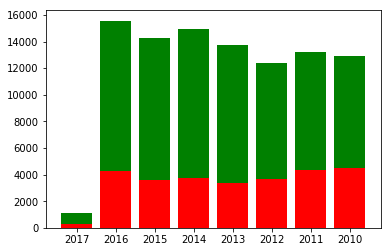

Fail:

OrderedDict([('2017', 293),
             ('2016', 4298),
             ('2015', 3607),
             ('2014', 3719),
             ('2013', 3349),
             ('2012', 3642),
             ('2011', 4357),
             ('2010', 4504)])
Pass:

OrderedDict([('2017', 1098),
             ('2016', 15562),
             ('2015', 14285),
             ('2014', 14902),
             ('2013', 13718),
             ('2012', 12376),
             ('2011', 13229),
             ('2010', 12878)])


In [10]:
plt.show()

print('Fail:\n')
pprint(years_fail)
print('Pass:\n')
pprint(years_pass)

## Out of all the restaurant inspections how many were because of a complaint and how many were because of suspected food poisoning?

In [11]:
p = 0
i = 0
c = 0

for idx, row in data.iterrows():
    if type(row["Inspection Type"]) == str:
        if 'poisoning' in row["Inspection Type"].lower():
            p += 1
        elif "complaint" in row["Inspection Type"].lower():
            c += 1
        i += 1
print('Total Number of Inspections: {0}\nNumber of inspections were suspected food poisoning: {1}\nNumber of inspections were complaints: {2}'.format(i, p, c))

Total Number of Inspections: 143471
Number of inspections were suspected food poisoning: 843
Number of inspections were complaints: 23887


## How many restaurants pass vs fail?

In [12]:
f = 0
p = 0

for idx, row in data.iterrows():
    if type(row["Facility Type"]) == str and 'Restaurant' in row["Facility Type"]:
        if "Pass" in row["Results"]:
            p += 1
        elif "Fail" in row["Results"]:
            f += 1
print('Number of restaurants that pass: {0}\nNumber of restaurants that fail: {1}'.format(p, f))

Number of restaurants that pass: 66404
Number of restaurants that fail: 17491


# Conclusion more passing then failing so bon appetit in Chicago